In [43]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import joblib

In [28]:
data = pd.read_csv('./market_order.csv', low_memory=False)
data = data.dropna()

In [29]:
display(data.head())
display(data.info())
display(data.isna().sum())
display(data.describe())

,OrderId,ItemId,LocationId,QualityLevel,UnitPriceSilver,Amount,AuctionType,Tier,Subtier,Trusted
0,1.045759e+10,TREASURE_KNOWLEDGE_RARITY3,1002,1,23733,2,offer,1,0.0,True
1,1.045752e+10,TREASURE_KNOWLEDGE_RARITY3,1002,1,23736,1,offer,1,0.0,True
2,1.045748e+10,TREASURE_KNOWLEDGE_RARITY3,1002,1,23738,4,offer,1,0.0,True
3,1.045752e+10,TREASURE_KNOWLEDGE_RARITY3,1002,1,23736,1,offer,1,0.0,True
4,1.045749e+10,TREASURE_KNOWLEDGE_RARITY3,1002,1,23738,13,offer,1,0.0,True


<class 'pandas.core.frame.DataFrame'>
Index: 4027158 entries, 0 to 4195980
Data columns (total 10 columns):
 #   Column           Dtype  
---  ------           -----  
 0   OrderId          float64
 1   ItemId           object 
 2   LocationId       int64  
 3   QualityLevel     int64  
 4   UnitPriceSilver  int64  
 5   Amount           int64  
 6   AuctionType      object 
 7   Tier             int64  
 8   Subtier          float64
 9   Trusted          bool   
dtypes: bool(1), float64(2), int64(5), object(2)
memory usage: 311.1+ MB


None

OrderId            0
ItemId             0
LocationId         0
QualityLevel       0
UnitPriceSilver    0
Amount             0
AuctionType        0
Tier               0
Subtier            0
Trusted            0
dtype: int64

,OrderId,LocationId,QualityLevel,UnitPriceSilver,Amount,Tier,Subtier
count,4.027158e+06,4.027158e+06,4.027158e+06,4.027158e+06,4.027158e+06,4.027158e+06,4.027158e+06
mean,2.025527e+10,2.407288e+03,2.219653e+00,1.216512e+08,1.781760e+02,5.221849e+00,7.644021e-01
std,2.206973e+10,1.350816e+03,1.254487e+00,2.573170e+08,5.395287e+02,1.741779e+00,1.131365e+00
min,1.165420e+05,7.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
25%,1.046278e+10,1.002000e+03,1.000000e+00,4.652000e+03,1.000000e+00,4.000000e+00,0.000000e+00
50%,1.047265e+10,3.003000e+03,2.000000e+00,3.998800e+04,2.000000e+00,5.000000e+00,0.000000e+00
75%,1.243148e+10,3.008000e+03,3.000000e+00,2.000000e+06,1.420000e+02,6.000000e+00,1.000000e+00
max,9.999963e+10,5.003000e+03,5.000000e+00,1.000000e+09,9.999000e+03,8.000000e+00,4.000000e+00


In [30]:

labelEncoderItemId = LabelEncoder()
labelEncoderAuctionType = LabelEncoder()
labelEncoderLocationId = LabelEncoder()
labelEncoderTrusted = LabelEncoder()

# Обучаем энкодеры, чтобы в дальнейшем их сохранить и использовать на входных данных
data['ItemId'] = labelEncoderItemId.fit_transform(data['ItemId'].values)
data['AuctionType'] = labelEncoderAuctionType.fit_transform(data['AuctionType'].values)
data['LocationId'] = labelEncoderLocationId.fit_transform(data['LocationId'].values)
data['Trusted'] = labelEncoderTrusted.fit_transform(data['Trusted'].values)

display(data.head())

,OrderId,ItemId,LocationId,QualityLevel,UnitPriceSilver,Amount,AuctionType,Tier,Subtier,Trusted
0,1.045759e+10,8018,1,1,23733,2,0,1,0.0,1
1,1.045752e+10,8018,1,1,23736,1,0,1,0.0,1
2,1.045748e+10,8018,1,1,23738,4,0,1,0.0,1
3,1.045752e+10,8018,1,1,23736,1,0,1,0.0,1
4,1.045749e+10,8018,1,1,23738,13,0,1,0.0,1


In [31]:
X = data.drop('Trusted', axis=1) # признаки
y = data['Trusted'] # целевая переменная

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=51)

In [33]:
# Масштабируем данные
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)
y_train = np.array(y_train)

display(X_test_scaled)
display(y_train)

array([[-0.44321368,  0.21087279, -0.56983137, ..., -0.61238751,
         0.44660235, -0.67576422],
       [ 1.36471842,  0.87523123,  1.77791329, ..., -0.61238751,
         1.02066811, -0.67576422],
       [-0.10980702,  1.09945767,  1.30836436, ...,  1.63295297,
         1.02066811, -0.67576422],
       ...,
       [-0.44343318, -1.53257541,  0.83881542, ..., -0.61238751,
        -2.42372648, -0.67576422],
       [-0.44400231, -0.72895133, -1.50892923, ...,  1.63295297,
        -0.70152918, -0.67576422],
       [-0.44398859, -0.13116012,  1.30836436, ..., -0.61238751,
        -0.12746342, -0.67576422]])

array([1, 1, 1, ..., 1, 0, 0])

In [34]:
# rfc = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
rfc = RandomForestClassifier()

In [35]:
rfc.fit(X_train_scaled, y_train)
display(rfc.score(X_train_scaled, y_train))

1.0

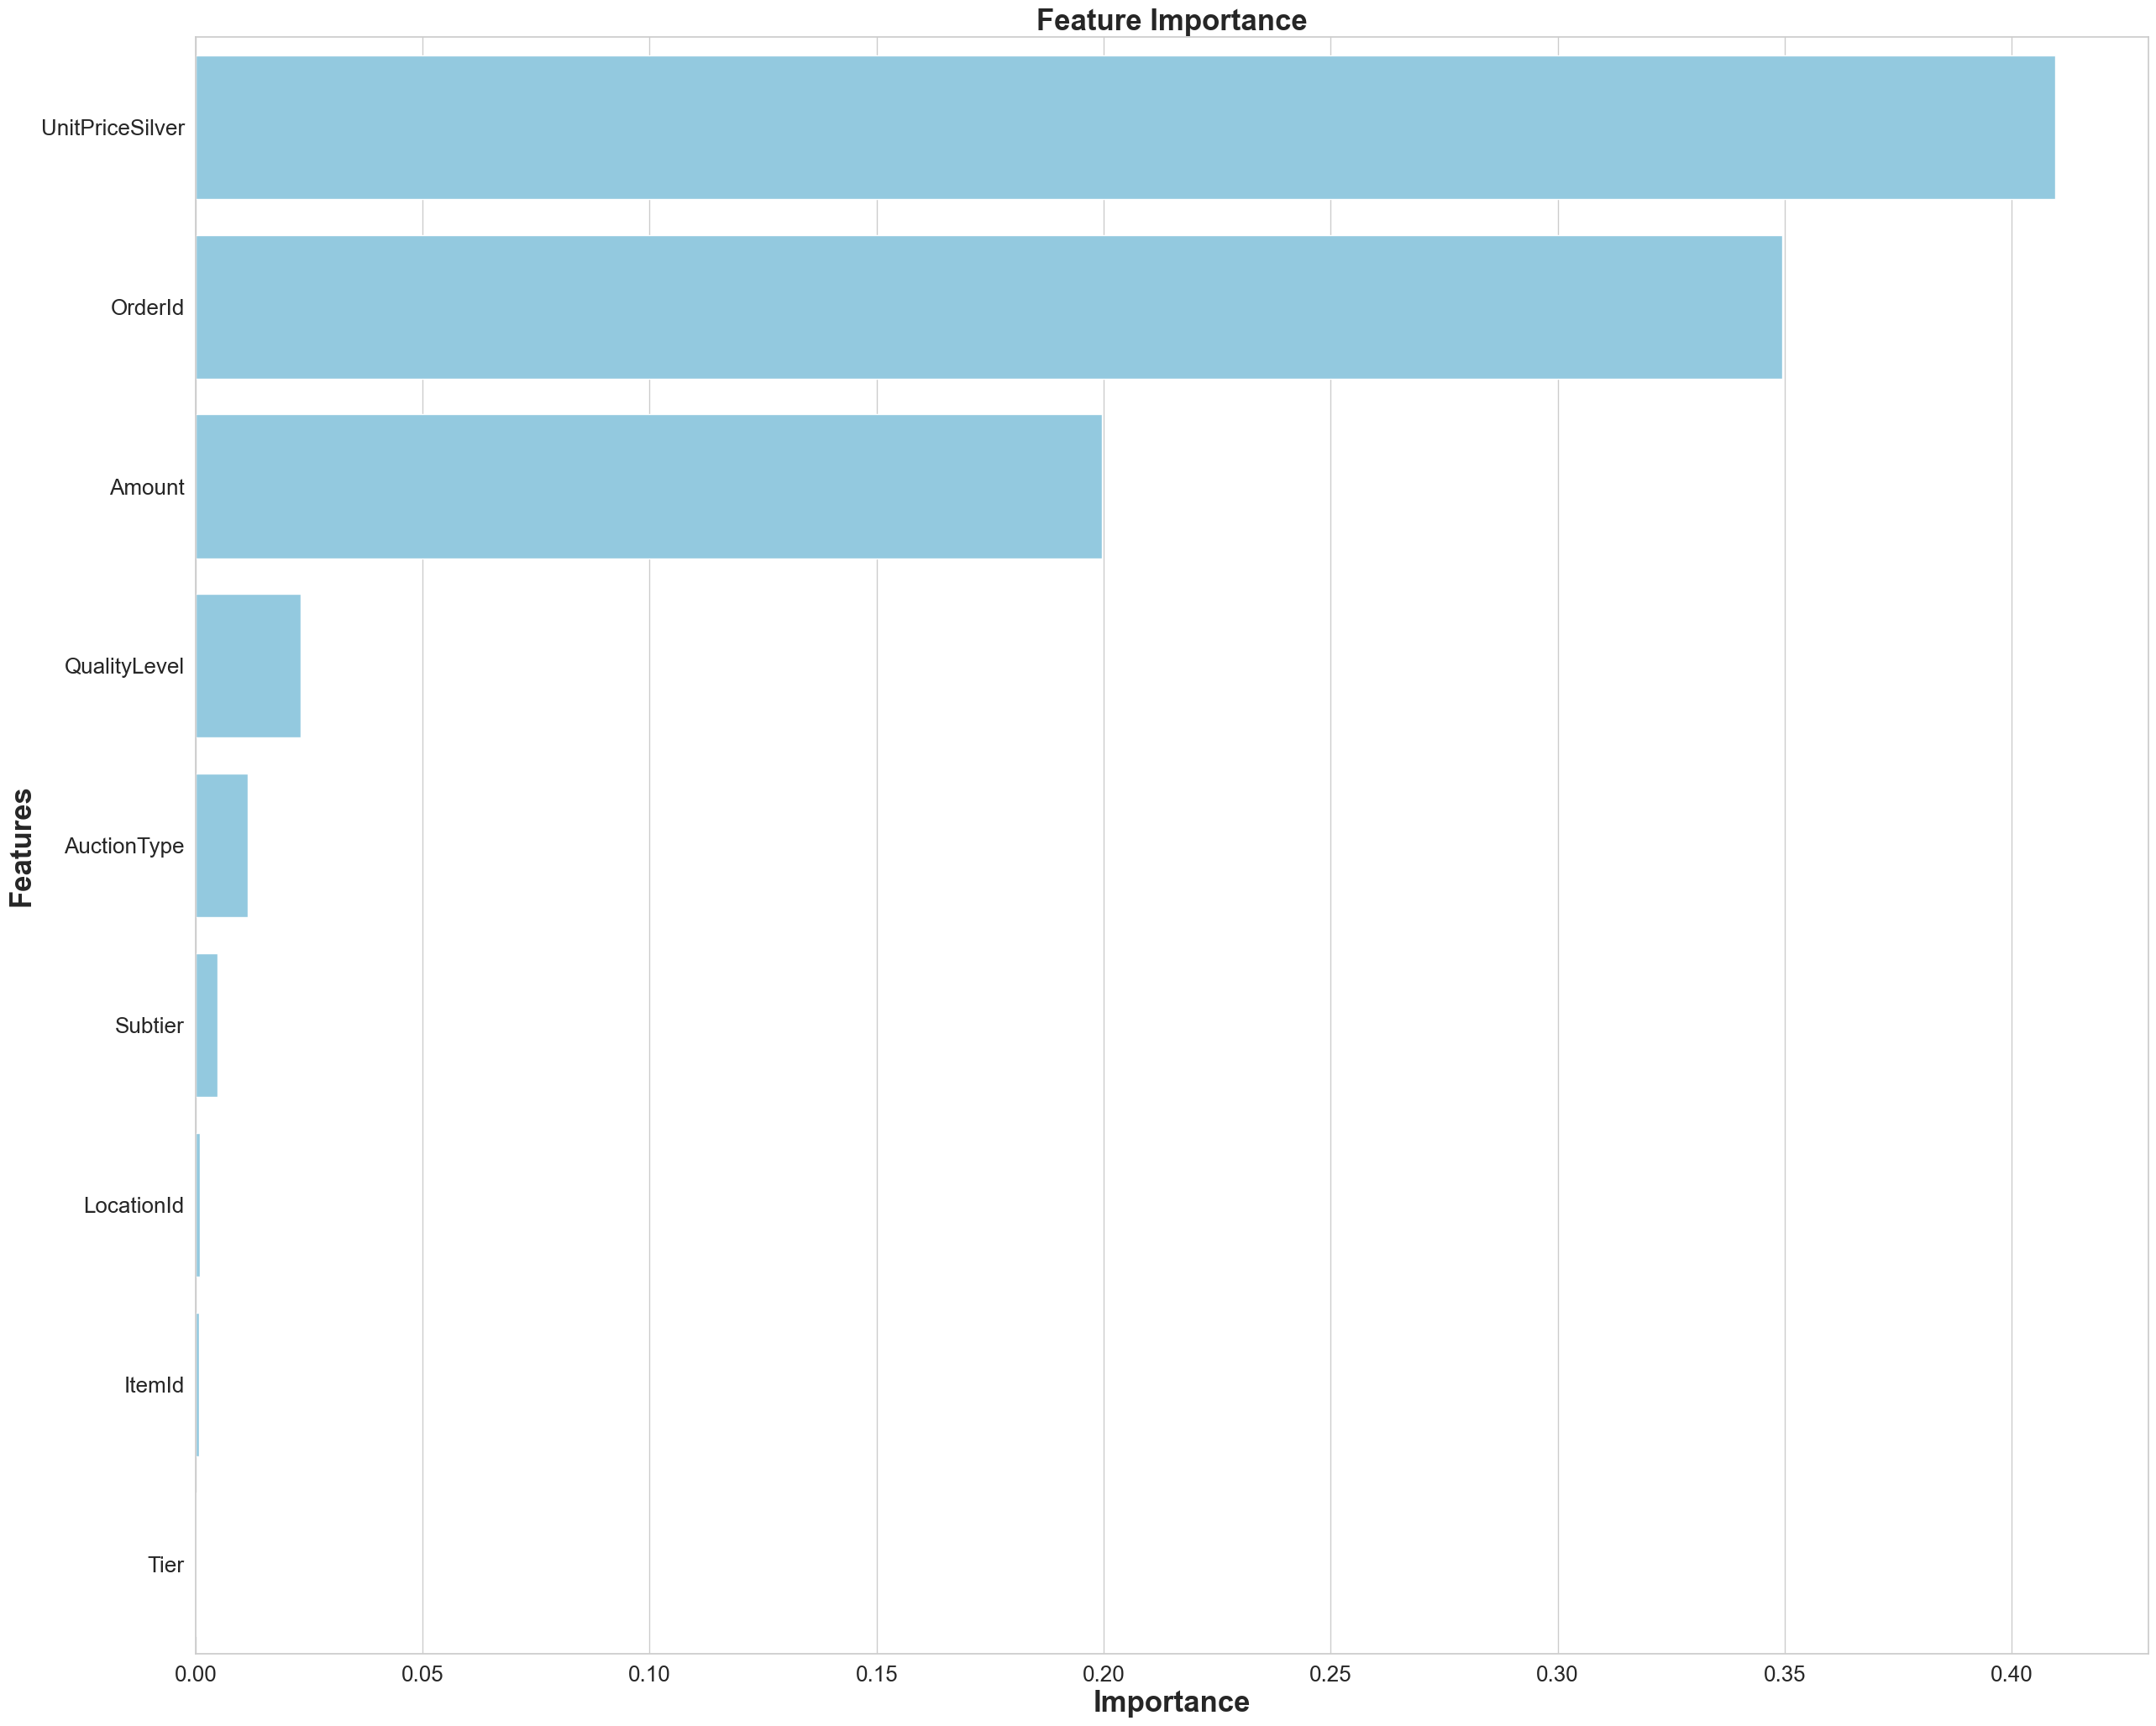

None

,Features,Gini-Importance
0,UnitPriceSilver,0.409611
1,OrderId,0.349521
2,Amount,0.199614
3,QualityLevel,0.023083
4,AuctionType,0.011427
5,Subtier,0.004749
6,LocationId,0.001032
7,ItemId,0.000698
8,Tier,0.000266


In [47]:
feats = {}
for feature, importance in zip(data.columns, rfc.feature_importances_):
    feats[feature] = importance
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-Importance'})
importances = importances.sort_values(by='Gini-Importance', ascending=False)
importances = importances.reset_index()
importances = importances.rename(columns={'index': 'Features'})
sns.set(font_scale = 5)
sns.set(style="whitegrid", color_codes=True, font_scale = 1.7)
fig, ax = plt.subplots()
fig.set_size_inches(30,25)
sns.barplot(x=importances['Gini-Importance'], y=importances['Features'], data=importances, color='skyblue')
plt.xlabel('Importance', fontsize=25, weight = 'bold')
plt.ylabel('Features', fontsize=25, weight = 'bold')
plt.title('Feature Importance', fontsize=25, weight = 'bold')
display(plt.show())
display(importances)

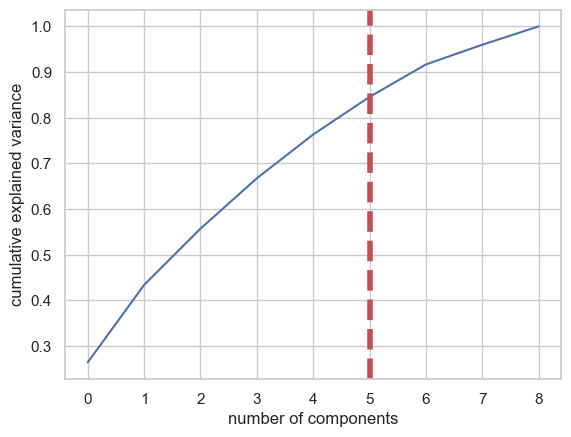

None

,Cumulative Variance Ratio,Explained Variance Ratio
0,0.264020,0.264020
1,0.433618,0.169598
2,0.556896,0.123279
3,0.667278,0.110382
4,0.763213,0.095935
5,0.845549,0.082336
6,0.916644,0.071095
7,0.959779,0.043135
8,1.000000,0.040221


In [48]:
pca_test = PCA(n_components=9)
pca_test.fit(X_train_scaled)
sns.set(style='whitegrid')
plt.plot(np.cumsum(pca_test.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.axvline(linewidth=4, color='r', linestyle = '--', x=5, ymin=0, ymax=1)
display(plt.show())
evr = pca_test.explained_variance_ratio_
cvr = np.cumsum(pca_test.explained_variance_ratio_)
pca_df = pd.DataFrame()
pca_df['Cumulative Variance Ratio'] = cvr
pca_df['Explained Variance Ratio'] = evr
display(pca_df.head(10))

In [41]:
y_pred = rfc.predict(X_test_scaled)

In [46]:
from sklearn.metrics import confusion_matrix
conf_matrix_baseline = pd.DataFrame(confusion_matrix(y_test, y_pred), index = ['actual NOT trusted', 'actual trusted'], columns = ['predicted NOT trusted', 'predicted trusted'])
display(conf_matrix_baseline)
display('Baseline Random Forest recall score', recall_score(y_test, y_pred))
display('Baseline Random Forest f1 score', f1_score(y_test, y_pred))


,predicted NOT trusted,predicted trusted
actual NOT trusted,195438,1
actual trusted,1,609992


'Baseline Random Forest recall score'

0.9999983606369254

'Baseline Random Forest f1 score'

0.9999983606369254

In [40]:
joblib.dump(rfc, './NatsTrap/build/neural_network.pkl')

joblib.dump(labelEncoderItemId, './NatsTrap/build/labelEncoderItemId.pkl')
joblib.dump(labelEncoderAuctionType, './NatsTrap/build/labelEncoderAuctionType.pkl')
joblib.dump(labelEncoderLocationId, './NatsTrap/build/labelEncoderLocationId.pkl')
joblib.dump(labelEncoderTrusted, './NatsTrap/build/labelEncoderTrusted.pkl')

joblib.dump(ss, './NatsTrap/build/standardscaler.pkl')

['./NatsTrap/build/standardscaler.pkl']

array([-0.18226127,  0.89023907, -1.50341987,  0.93105799, -0.05084473,
       -0.16377395, -0.50924758,  1.09968647,  0.30587406])

In [159]:
labelEncoderItemId.transform(['TREASURE_KNOWLEDGE_RARITY3', 'T7_SOUL'])

array([8196, 6652])